# Ejercicio de optimización de una viga

© 2022 Exneyder A. Montoya-Araque, Daniel F. Ruiz and Universidad EAFIT.

This notebook can be interactively run in [Google - Colab](https://colab.research.google.com/github/AppliedMechanics-EAFIT/soil_dynamics/blob/main/notebooks/ej_optimizacion_viga.ipynb).

## Required modules and global setup for plots

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from ipywidgets import widgets as wgt
from IPython import get_ipython
from IPython.display import display

if 'google.colab' in str(get_ipython()):
    from google.colab import output
    output.enable_custom_widget_manager()
    %pip install ipympl &> ~/pip-log.txt

%matplotlib widget

plt.style.use("default")
mpl.rcParams.update(
    {
        'figure.constrained_layout.use': True,
        'interactive': False,
        "text.usetex": False,  # Use mathtext, not LaTeX
        "font.family": "cmr10",  # Use the Computer modern font
        "mathtext.fontset": "cm",
        "axes.formatter.use_mathtext": True,
        "axes.unicode_minus": False,
    }
)
html_setup = '<style> div.jupyter-widgets.widget-label {display: none;} </style>'

## Sistema de 1 grado de libertad - Vibración forzada con amortiguamiento

Para un sistema con amortoguamiento viscoso sujeto a una excitación externa armónica $F = F_0  \sin (\alpha t)$:

* La respuesta dinámica consiste en dos partes: una respuesta transitoria (solución homogenea) y una respuesta permanete (solución particuar o complementaria).
* La ecuación general de movimiento sería $m \ddot{x} + c \dot{x} + K x = F_0  \sin (\alpha t)$
* La vibración temporal eventualmente cesa por el amortiguamiento del sistema
* La vibración permanete durará mientras se mantenga la excitación externa con frecuncia $\alpha$

El desplazamiento de la solución homogénea  $x_\mathrm{h}$ está dado por la siguiente ecuación (igual a la de vibración libre amortiguada):
$$
x_\mathrm{h} = e^{-\omega_\mathrm{n} \beta t} \left( C_1 \cos(\omega_\mathrm{d} t) + C_2 \sin(\omega_\mathrm{d} t) \right)
$$


El desplazamiento de la solución particular $x_\mathrm{p}$ está dado por la siguiente ecuación:

$$
x_\mathrm{p} = A_\mathrm{F} \sin(\alpha t + \theta)
$$

Donde, $A_\mathrm{F}$ es la amplitud pico de $x_\mathrm{p}$.
$$
A_\mathrm{F} = \frac{\frac{F_0}{K}}{\sqrt{ \left( 1 - r^2  \right)^2  +    \left( 2\beta r \right)^2   }}
$$

$\theta$ es el ángulo de desfase entre el inicio del movimiento y el inicio de la excitación externa

$$
\tan \theta = \frac{2\beta r}{1 - r^2}
$$

$r$ es la relación frecuencial

$$
r = \frac{\alpha}{\omega_\mathrm{n}}
$$



In [2]:
def forced_vibr_1dof_damped(c_1, c_2, a_f, beta, w_n,  alpha, t_max=100, widget=False):
    # Movement function
    t = np.linspace(0, t_max, int(t_max * 100))
    w_d = w_n * np.sqrt(1 - beta**2)
    x_h = np.exp(-w_n * beta * t) * (c_1 * np.cos(w_d * t) + c_2 * np.sin(w_d * t))
    r = alpha / w_n
    phase_ang = np.arctan(2 * beta * r / (1 - r**2))
    x_p = a_f * np.sin(alpha * t + phase_ang)

    # Plot
    fig, ax = plt.subplots(ncols=1, nrows=1, figsize=[6, 2.5])
    ax.plot(t, x_h, color="tomato", label="Solucion homogenea")
    ax.plot(t, x_p, color="teal", label="Solucion particular")
    ax.plot(t, x_h + x_p, ls='--', color="k", label="Superposicion")
    ax.set(xlabel="Tiempo, $t$", ylabel="Desplazamiento, $x$")
    ax.set_title("Vibracion forzada con amortiguamiento")
    ax.spines["top"].set_visible(True)
    ax.spines["right"].set_visible(True)
    ax.spines["bottom"].set_linewidth(1.5)
    ax.spines["left"].set_linewidth(1.5)
    ax.grid(True, which="major", color="#999999", linestyle="--")
    ax.legend(loc="lower center", bbox_to_anchor=(0.5, -0.5), ncol=3)
    if widget:
        display(fig)
    else:
        plt.show()
        display(wgt.HTML(html_setup))
    plt.close()
    return

s, l = {'description_width': '50px'}, wgt.Layout(width='400px')
controls = {
    'c_1': wgt.FloatSlider(value=1, min=0, max=10, step=0.2, description="C₁", style=s, layout=l),
    'c_2': wgt.FloatSlider(value=2, min=0, max=10, step=0.2, description="C₂", style=s, layout=l),
    'a_f': wgt.FloatSlider(value=1, min=0, max=10, step=0.5, description="F₀", style=s, layout=l),
    'w_n': wgt.FloatSlider(value=1, min=0.0001, max=5, step=0.05, description="𝜔ₙ", style=s, layout=l),
    'beta': wgt.FloatSlider(value=0.05, min=0, max=1, step=0.02, description="𝛽", style=s, layout=l),
    'alpha': wgt.FloatSlider(value=0.5, min=0.0001, max=5, step=0.05, description="α", style=s, layout=l),
    't_max': wgt.FloatSlider(value=50, min=0, max=300, step=0.5, description="t", style=s, layout=l),
    'widget': wgt.Checkbox(value=True, description='Non-vector image (improve widget performance)', style=s, layout=l)
}
fig = wgt.interactive_output(forced_vibr_1dof_damped, controls)
wgt.HBox((wgt.VBox(list(controls.values())), fig), layout=wgt.Layout(align_items='center'))

El anterior gráfico corresponde a la representación generalizada del movimiento de un sistema de un grado de libertada con vibración forazada y con amortiguamiento. La solución está compuesta por la superposición de las soluciones homogénea y particular, es decir $x = x_\mathrm{h} + x_\mathrm{p}$.

# Ejercicio de la viga

## Solución homogénea

$$
C_1 = x_0
$$

$$
C_2 = \frac{\dot{x}_0 + \omega_\mathrm{n}\beta x_0}{\omega_\mathrm{d}} = \frac{\omega_\mathrm{n}\beta \delta_\mathrm{est}}{\omega_\mathrm{d}}
$$

$$
x_\mathrm{h} = e^{-\omega_\mathrm{n} \beta t} \left( x_0 \cos(\omega_\mathrm{d} t) +  \frac{\dot{x}_0 + \omega_\mathrm{n}\beta x_0}{\omega_\mathrm{d}} \sin(\omega_\mathrm{d} t) \right)
$$

## Solución particular

$$
x_\mathrm{p} = \delta_\mathrm{est} X \sin(\alpha t + \theta)
$$
Con

* $\delta_\mathrm{est}$, la deformación estática generada por la excitación externa:

$$
\delta_\mathrm{est} = \frac{F_0}{K}
$$

* $X$, función de amplificación:
$$
X = \frac{1}{\sqrt{ \left( 1 - r^2  \right)^2  +    \left( 2\beta r \right)^2   }}
$$

* $\theta$ ángulo de desfase:
$$
\tan \theta = \frac{2\beta r}{1 - r^2}
$$



In [3]:
def ejercicio_viga(x_0=0, x_p_0=50, beta=0.05, mod_elast=25000, gamma_v=24, l=5,
                   h=0.4, b=0.3, masa_maq=0.2, f_alpha=5, t_max=2.5, widget=False):
    """
    mod_elast en MPa, l, h, b en m. alpha en Hz. masa_maq en t.
    tiempos en s. Desplazamientos graficados en mm, internamente  en m.
    velocidad en mm/s, internamente  en m/s
    """
    masa_maq = masa_maq * 1000  # [kg]
    w_alpha = f_alpha * 2 * np.pi  # [rad/s]
    inercia = b * h ** 3 / 12  # [m^4]
    k = (3 * mod_elast * inercia / l ** 3) * 1e3  # [kN/m]
    masa_viga = l * h * b * gamma_v / 9.8  # [kN s^2/m] = [kg*1000]
    w_n = np.sqrt(k / masa_viga)  # frec natural angular [rad/s]
    f_n = w_n / (2 * np.pi)  # frec natural [Hz]
    w_d = w_n * np.sqrt(1 - beta ** 2)  # frecuenca angular amortiguada
    c_critico = 2 * np.sqrt(k * masa_viga)  # [kN s/m]
    c = beta * c_critico  # [kN s/m]

    # Solución desplazamientos
    t = np.linspace(0, t_max, int(t_max * 100))
    w_d = w_n * np.sqrt(1 - beta ** 2)  # frecuenca amortiguada
    r = w_alpha / w_n  # relación de frecuencias
    theta = np.arctan(2 * beta * r / (1 - r ** 2))

    # Solución homogéna
    f_0 = masa_maq * 9.8 * 1e-3  # [kN]
    delta_est = f_0 / k  # def. estática: 2.083 mm
    c_1 = x_0 * 1e-3
    c_2 = (x_p_0 * 1e-3 + w_n * beta * c_1) / w_d
    x_h = np.exp(-w_n * beta * t) * (
        c_1 * np.cos(w_d * t) + c_2 * np.sin(w_d * t)
    )  # + delta_est
    # Solución particular
    f_amplif = 1 / np.sqrt((1 - r ** 2) ** 2 + (2 * beta * r) ** 2)
    a_f = delta_est * f_amplif
    x_p = a_f * np.sin(w_alpha * t + theta)

    # Plot
    fig, ax = plt.subplots(ncols=1, nrows=1, figsize=[7, 3])
    ax.plot(t, 1000 * (x_h + delta_est), color="tomato", label="Solucion homogenea")
    ax.axhline(
        y=1000 * delta_est, ls="--", color="k",
        label="$\delta_\mathrm{est}$=" + f"{1000*delta_est:.1f} mm",
    )
    ax.plot(
        t, 1000 * (x_p + delta_est), color="teal",
        label="Solucion particular\n"
        + "$f_\\alpha=$"
        + f"{f_alpha:.2f}, "
        + "$f_\mathrm{n}=$"
        + f"{f_n:.2f} \n"
        + "$r=\\frac{f_\\alpha}{f_\mathrm{n}}=$"
        + f"{r:.2f} \n"
        + f"X = {f_amplif:.2f} \n"
        + "X$\delta_\mathrm{est}$="
        + f"{1000*a_f:.2} mm"
    )
    ax.plot(
        t, 1000 * (x_h + x_p + delta_est), ls=":", color="k",
        label="$x = x_\mathrm{h} + x_\mathrm{p}$",
    )
    ax.set(xlabel="Tiempo, $t$", ylabel="Desplazamiento, $x$  [mm]")
    ax.set_title("Vibracion forzada con amortiguamiento")
    ax.spines["top"].set_visible(True)
    ax.spines["right"].set_visible(True)
    ax.spines["bottom"].set_linewidth(1.5)
    ax.spines["left"].set_linewidth(1.5)
    ax.grid(True, which="major", color="#999999", linestyle="--")
    ax.legend(loc="center left", bbox_to_anchor=(1.0, 0.5), ncol=1)
    if widget:
        display(fig)
    else:
        plt.show()
        display(wgt.HTML(html_setup))
    plt.close()
    return


s, l = {'description_width': '80px'}, wgt.Layout(width='400px')
controls = {
    'x_0': wgt.FloatSlider(value=-2, min=-10, max=10, step=0.05, description="X₀ [mm]", style=s, layout=l),
    'x_p_0': wgt.FloatSlider(value=0, min=-300, max=300, step=5, description="X'₀ [mm/s]", style=s, layout=l),
    'beta': wgt.FloatSlider(value=0.05, min=0, max=1, step=0.01, description="𝛽", style=s, layout=l),
    'mod_elast': wgt.FloatSlider(value=25000, min=10000, max=50000, step=500, description="E [MPa]", style=s, layout=l),
    'gamma_v': wgt.FloatSlider(value=24, min=5, max=50, step=1, description="𝛾 [kN/m³]", style=s, layout=l),
    'l': wgt.FloatSlider(value=5, min=0, max=15, step=0.2, description="l [m]", style=s, layout=l),
    'h': wgt.FloatSlider(value=0.4, min=0, max=2, step=0.02, description="h [m]", style=s, layout=l),
    'b': wgt.FloatSlider(value=0.3, min=0, max=2, step=0.02, description="b [m]", style=s, layout=l),
    'masa_maq': wgt.FloatText(value=0.2, description="Masa máq. [t]", style=s, layout=l),
    'f_alpha': wgt.FloatText(value=5, description="f_alpha [Hz]", style=s, layout=l),
    't_max': wgt.FloatText(value=2.5, description="t_max [s]", style=s, layout=l),
    'widget': wgt.Checkbox(value=True, description='Non-vector image (improve widget performance)', style=s, layout=l)
}
fig = wgt.interactive_output(ejercicio_viga, controls)
wgt.HBox((wgt.VBox(list(controls.values())), fig), layout=wgt.Layout(align_items='center'))


La anterior gráfica muestra la solución para los desplazamientos en el extremo libre de la viga ante la excitación armónica generada por la máquina vibrando en el extremo libre. 

Las oscilaciones ocurren alrededor de un desplazamiento de aproximadamente 2 mm que corresponde al desplazamiento estático ($\delta_\mathrm{est}$) generado por el peso de la máquina.

Los desplazamientos dados por la solución homogénea, y por ende los de la solución completa (homogénea + particular) dependen de las condiciones iniciales que sacan de equilibrio al sistema.  Dicha condición inicial podría ser un desplazamiento ($x_0$) o velocidad ($\dot{x}_0$) inicial definidos (o ambos).  Cualquier variación en dichos parámeteros modifica la respuesta del sistema.

En el caso particular del ejercicio se interpreta que $\dot{x}_0 = 0$, es decir que la máquina no se deja caer sobre la viga sino que esta se dispone gradualmente hasta alcanzar la deformación estática dada por el peso. Para sacar de equilibrio al sistema se establece un $\dot{x}_0 = -\delta_\mathrm{est}$, es decir que se lleva a la viga a la posición original sin desplazamiento estático ocasionado por el peso de la máquina, por lo cual la solución homogénea arranca desde $x = 0$ para $t=0$.



## Optimización

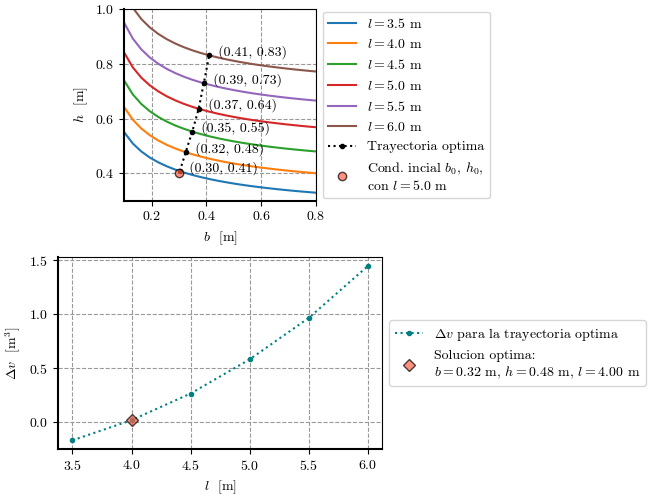

HTML(value='<style> div.jupyter-widgets.widget-label {display: none;} </style>')

In [4]:
from scipy.optimize import root
from shapely.geometry import LineString, Point

# Plot
fig, axs = plt.subplots(ncols=1, nrows=2, figsize=[6.5, 5])

hb_inicial = Point((0.3, 0.4))
punto_cercano = []
delta_vol = []

rango_l = [3.5, 4.0, 4.5, 5.0, 5.5, 6]
for l in rango_l:
    h_optimo = list()
    rango_b = np.linspace(0.1, 1.0, 30)
    for b in rango_b:

        def optimizacion_viga(h, b=b, l=l, beta=0.05, mod_elast=25000, masa_maq=0.2, f_alpha=5):
            """
            mod_elast en MPa, l, h, b en m. alpha en Hz. masa_maq en t.
            tiempos en s. Desplazamientos en m (salidas en mm).
            """
            masa_maq = masa_maq * 1000  # [kg]
            w_alpha = f_alpha * 2 * np.pi  # [rad/s]
            inercia = b * h ** 3 / 12  # [m^4]
            k = (3 * mod_elast * inercia / l ** 3) * 1e3  # [kN/m]
            masa_viga = l * h * b * 24 / 9.8  # [kN s^2/m] = [kg*1000]
            w_n = np.sqrt(k / masa_viga)  # frec natural angular [rad/s]

            # Solución particular
            r = w_alpha / w_n  # relación de frecuencias
            f_0 = masa_maq * 9.8 * 1e-3  # [kN]
            delta_est = f_0 / k
            f_amplif = 1 / np.sqrt((1 - r ** 2) ** 2 + (2 * beta * r) ** 2)
            a_f = delta_est * f_amplif
            return 1e3 * a_f - 1

        raiz = root(
            fun=optimizacion_viga, x0=5, method="lm", options={"maxiter": 5000}
        )
        h_optimo.append(raiz.x[0])

    axs[0].plot(rango_b, h_optimo, label="$l=$" + f"{l:.1f} m")

    linea_hb_opt = LineString(np.array((rango_b, h_optimo)).T)
    proyeccion = linea_hb_opt.interpolate(linea_hb_opt.project(hb_inicial))
    axs[0].text(proyeccion.x, proyeccion.y, s=f"  ({proyeccion.x:.2f}, {proyeccion.y:.2f})")
    delta_vol.append(
        proyeccion.x * proyeccion.y * l - hb_inicial.x * hb_inicial.y * 5
    )
    punto_cercano += list(proyeccion.coords)

punto_cercano = np.array(punto_cercano).T
axs[0].plot(
    *punto_cercano, ls=":", marker=".", color="k", label="Trayectoria optima"
)
axs[0].plot(
    0.3, 0.4, ls="", marker="o", color="tomato", markeredgecolor="k", alpha=0.7,
    label="Cond. incial $b_0$, $h_0$,\ncon $l=5.0$ m",
)
axs[0].set(
    xlabel="$b$  [m]", ylabel="$h$  [m]", xlim=(0.1, 0.8), ylim=(0.3, 1)
)
axs[0].set_aspect("equal", "box")

axs[1].plot(
    rango_l, delta_vol, ls=":", marker=".", color="teal",
    label="$\Delta v$ para la trayectoria optima",
)
n_opt = 1
axs[1].plot(
    rango_l[n_opt], delta_vol[n_opt], ls="", marker="D", color="tomato", markeredgecolor="k", alpha=0.7,
    label=f"Solucion optima:\n$b=${punto_cercano[0, n_opt]:.2f} m, $h=${punto_cercano[1, n_opt]:.2f} m, $l=${rango_l[n_opt]:.2f} m",
)
axs[1].set(xlabel="$l$  [m]", ylabel="$\Delta v$  [m$^3$]")
for ax in axs:
    ax.spines["top"].set_visible(True)
    ax.spines["right"].set_visible(True)
    ax.spines["bottom"].set_linewidth(1.5)
    ax.spines["left"].set_linewidth(1.5)
    ax.grid(True, which="major", color="#999999", linestyle="--")
    ax.legend(loc="center left", bbox_to_anchor=(1.0, 0.5), ncol=1)
# fig.tight_layout()
plt.show()
display(wgt.HTML(html_setup))
plt.close()

En la gráfica anterior se presenta el resultado de optimización del diseño de la viga tal que el desplazamiento máximo en la solución homogénea sea de 1 mm, incuyendo la deformación estática $\delta_\mathrm{est}$ y su amplificación dada por $X$ para cierta relación de frecuencias.

En la subfigura superior se presentan combinaciones de altura $h$, ancho $b$ y longitud $l$ de la viga tal que $\delta_\mathrm{est} X = 1\,\mathrm{mm}$; cada combinación corresponde a una de las líneas de colores.  Esta misma subfigura contiene el punto que representa la configuración geométrica inicial de la viga, el cual no corresponde a ninguna de las soluciones óptimas, ya que como se mostró en la primera parte $\delta_\mathrm{est} = 2\,\mathrm{mm} >  1\,\mathrm{mm}$. Finalmente se presenta una secuencia de puntos negros denominados "trayectoria óptima" que corresponde a los puntos más cercanos sobre las líneas de colores con respecto a la geometría inicial, de tal forma que se tengan que hacer los menores cambios geométricos posibles para cumplir la condición dada.

La subfigura inferior muestra los cambios de volumen de la viga para los diferentes puntos de la trayectoria óptima, encontrándose que para $l=4.00\ \mathrm{m}$, $b=0.32\ \mathrm{m}$ y $h=0.48\ \mathrm{m}$, se tiene una solución óptima que cumple que  $\delta_\mathrm{est} X = 1\,\mathrm{mm}$ y donde no hay necesidad de cambiar el volumen original de la viga.  Si se requiriera mantener la longitud inicial de la viga, la solución óptima tendría entonces $l=5.00\ \mathrm{m}$, $b=0.37\ \mathrm{m}$ y $h=0.64\ \mathrm{m}$, pero implicaría un incremento de volumen de aproximadamente $0.6 \mathrm{m}^3$.

En la siguente figura se representa la solución para los desplazamientos teniendo en cuenta la solución óptima sin cambio de volumen, con lo cual se verifica que se cumple la condición requerida.

In [5]:
s, l = {'description_width': '80px'}, wgt.Layout(width='400px')
controls = {
    'x_0': wgt.FloatSlider(value=-0.55, min=-10, max=10, step=0.05, description="X₀ [mm]", style=s, layout=l),
    'x_p_0': wgt.FloatSlider(value=0, min=-300, max=300, step=5, description="X'₀ [mm/s]", style=s, layout=l),
    'beta': wgt.FloatSlider(value=0.05, min=0, max=1, step=0.01, description="𝛽", style=s, layout=l),
    'mod_elast': wgt.FloatSlider(value=25000, min=10000, max=50000, step=500, description="E [MPa]", style=s, layout=l),
    'gamma_v': wgt.FloatSlider(value=24, min=5, max=50, step=1, description="𝛾 [kN/m³]", style=s, layout=l),
    'l': wgt.FloatSlider(value=4, min=0, max=15, step=0.2, description="l [m]", style=s, layout=l),
    'h': wgt.FloatSlider(value=0.48, min=0, max=2, step=0.02, description="h [m]", style=s, layout=l),
    'b': wgt.FloatSlider(value=0.32, min=0, max=2, step=0.02, description="b [m]", style=s, layout=l),
    'masa_maq': wgt.FloatText(value=0.2, description="Masa máq. [t]", style=s, layout=l),
    'f_alpha': wgt.FloatText(value=5, description="f_alpha [Hz]", style=s, layout=l),
    't_max': wgt.FloatText(value=2.5, description="t_max [s]", style=s, layout=l),
    'widget': wgt.Checkbox(value=True, description='Non-vector image (improve widget performance)', style=s, layout=l)
}
fig = wgt.interactive_output(ejercicio_viga, controls)
wgt.HBox((wgt.VBox(list(controls.values())), fig), layout=wgt.Layout(align_items='center'))